# **1.Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np

# **2.Create a DataFrame**

In [2]:
data=pd.DataFrame({
    'x1':[2,4,6,8,10],
    'x2':[12,14,16,18,20],
    'x3':[22,24,26,28,30]
})
index=['Sample A','Sample B','Sample C','Sample D','Sample E']
data.index=index

In [3]:
data

,x1,x2,x3
Sample A,2,12,22
Sample B,4,14,24
Sample C,6,16,26
Sample D,8,18,28
Sample E,10,20,30


# **3.Euclidean distance numerical example**

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

In [5]:
dist=euclidean_distances(data)

In [6]:
#Distance matrix
dist_mat=pd.DataFrame(dist,columns=index,index=index)
dist_mat

,Sample A,Sample B,Sample C,Sample D,Sample E
Sample A,0.000000,3.464102,6.928203,10.392305,13.856406
Sample B,3.464102,0.000000,3.464102,6.928203,10.392305
Sample C,6.928203,3.464102,0.000000,3.464102,6.928203
Sample D,10.392305,6.928203,3.464102,0.000000,3.464102
Sample E,13.856406,10.392305,6.928203,3.464102,0.000000


In [7]:
data.loc['Sample A'],data.loc['Sample B']

(x1     2
 x2    12
 x3    22
 Name: Sample A, dtype: int64,
 x1     4
 x2    14
 x3    24
 Name: Sample B, dtype: int64)

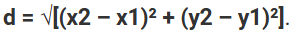

In [8]:
import numpy as np
dist_A_B=np.sqrt((2-4)**2+(12-14)**2+(22-24)**2)

In [9]:
dist_A_B

np.float64(3.4641016151377544)

# **4.Initialize centroids**

In [10]:
#Let's assume sample A and sample D are centroids
centroid_1=data.loc['Sample A']
centroid_2=data.loc['Sample D']

In [11]:
centroid_1

,Sample A
x1,2
x2,12
x3,22


In [12]:
centroid_2

,Sample D
x1,8
x2,18
x3,28


# **5.Calculate distances**

In [13]:
#Computig euclidean distance for all samples to centroid 1
sample_A_to_centroid_1=np.sqrt((2-2)**2+(12-12)**2+(22-22)**2)
sample_B_to_centroid_1=np.sqrt((4-2)**2+(14-12)**2+(24-22)**2)
sample_C_to_centroid_1=np.sqrt((6-2)**2+(16-12)**2+(26-22)**2)
sample_D_to_centroid_1=np.sqrt((8-2)**2+(18-12)**2+(28-22)**2)
sample_E_to_centroid_1=np.sqrt((10-2)**2+(20-12)**2+(30-22)**2)

In [14]:
#Distance DataFrame
centroid_1_dist=pd.DataFrame({
    'centroid 1 to all samples':[sample_A_to_centroid_1,sample_B_to_centroid_1,sample_C_to_centroid_1,sample_D_to_centroid_1,sample_E_to_centroid_1]})

In [15]:
centroid_1_dist

,centroid 1 to all samples
0,0.000000
1,3.464102
2,6.928203
3,10.392305
4,13.856406


In [16]:
data,centroid_2

(          x1  x2  x3
 Sample A   2  12  22
 Sample B   4  14  24
 Sample C   6  16  26
 Sample D   8  18  28
 Sample E  10  20  30,
 x1     8
 x2    18
 x3    28
 Name: Sample D, dtype: int64)

In [17]:
#Computig euclidean distance for all samples to centroid 2
sample_A_to_centroid_2=np.sqrt((2-8)**2+(12-18)**2+(22-28)**2)
sample_B_to_centroid_2=np.sqrt((4-8)**2+(14-18)**2+(24-28)**2)
sample_C_to_centroid_2=np.sqrt((6-8)**2+(16-18)**2+(26-28)**2)
sample_D_to_centroid_2=np.sqrt((8-8)**2+(18-18)**2+(28-28)**2)
sample_E_to_centroid_2=np.sqrt((10-8)**2+(20-18)**2+(30-28)**2)

In [18]:
centroid_2_dist=pd.DataFrame({
    'centroid 2 to all samples':[sample_A_to_centroid_2,sample_B_to_centroid_2,sample_C_to_centroid_2,sample_D_to_centroid_2,sample_E_to_centroid_2]})

In [19]:
centroid_2_dist

,centroid 2 to all samples
0,10.392305
1,6.928203
2,3.464102
3,0.000000
4,3.464102


In [20]:
#Distance DataFrame
dist_df=pd.concat([centroid_1_dist,centroid_2_dist],axis=1)

In [21]:
dist_df

,centroid 1 to all samples,centroid 2 to all samples
0,0.000000,10.392305
1,3.464102,6.928203
2,6.928203,3.464102
3,10.392305,0.000000
4,13.856406,3.464102


# **6.Calculate which centroid is small to corresponding samples**

In [22]:
For_sample_A=centroid_1 #cluster 1
For_sample_B=centroid_1 #cluster 1
For_sample_C=centroid_2 #cluster 2
For_sample_D=centroid_2 #cluster 2
For_sample_E=centroid_2 #cluster 2

In [23]:
data

,x1,x2,x3
Sample A,2,12,22
Sample B,4,14,24
Sample C,6,16,26
Sample D,8,18,28
Sample E,10,20,30


In [24]:
centroid_1,centroid_2

(x1     2
 x2    12
 x3    22
 Name: Sample A, dtype: int64,
 x1     8
 x2    18
 x3    28
 Name: Sample D, dtype: int64)

In [29]:
(2+4)/2,(12+14)/2,(22+24)/2 #New clusters

(3.0, 13.0, 23.0)

In [30]:
(6+8+10)/3,(16+18+20)/3,(26+28+30)/3 #New clusters

(8.0, 18.0, 28.0)

# **Conclusion: Iteratively calculate distance , at one point, same previous cluster comes when you calculate again , need to stop that point**